# Implementation of Gradient-Boost Algorithm

In [1]:
#Importing neccesary packages
# Load libraries
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

# Data Preparation

In [2]:
# Load data - Reading Boston Data
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names) #Independent columns

y = pd.Series(boston.target) #Dependent column - Median value of House

#Data Definition
#CRIM: Per capita crime rate by town
#ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
#INDUS: Proportion of non-retail business acres per town
#CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#NOX: Nitric oxide concentration (parts per 10 million)
#RM: Average number of rooms per dwelling
#AGE: Proportion of owner-occupied units built prior to 1940
#DIS: Weighted distances to five Boston employment centers
#RAD: Index of accessibility to radial highways

#TAX: Full-value property tax rate per $10,000

#PTRATIO: Pupil-teacher ratio by town
#B:  proportion of people of African American descent by town
#LSTAT: Percentage of lower status of the population
#MEDV: Median value of owner-occupied homes in $1000s

In [3]:
#Viewing Data - predictors
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
y[1:10] #response; MEDV: Median value of owner-occupied homes in $1000s

1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
dtype: float64

In [6]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

# Model training and evaluation

In [11]:
# Create gradientboost REGRESSOR object
gradientregressor = GradientBoostingRegressor(max_depth=2,n_estimators=100,learning_rate=1.0)

#Important Parameters

#n_estimators: Number of weak learners to train iteratively.

#learning_rate: It contributes to the weights of weak learners. It uses 0.1 as a default value.

In [12]:
# Train gradientboost REGRESSOR
model = gradientregressor.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [13]:
r2_score(y_pred,y_test)

0.8540807362441538

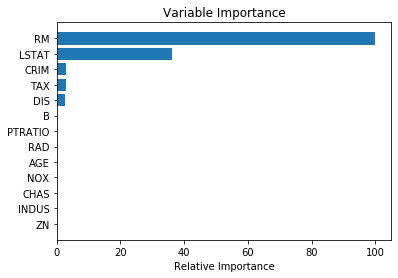

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot feature importance
feature_importance = model.feature_importances_ # which of the features are more important

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# Lets tune the hyperparameters

In [15]:
from sklearn.model_selection import GridSearchCV
LR = {'learning_rate':[0.15,0.1,0.10,0.05,1.0], 'n_estimators':[100,150,200,250], 'max_depth':[3, 10, 15, 20]} # tuning parameters

# telling GridSearchCV to take the learning estimator (here, GradientBoostingRegressor()) and parameters to tune in dictionary of list form
# scoring -- Strategy to evaluate the performance of the cross-validated model on the test set.
tuning = GridSearchCV(estimator =GradientBoostingRegressor(), param_grid = LR, scoring='r2', n_jobs=-1, cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_

({'learning_rate': 0.15, 'max_depth': 3, 'n_estimators': 150},
 0.8661121359934087)

In [17]:
# Create gradientboost REGRESSOR object
gradientregressor = GradientBoostingRegressor(learning_rate= 0.15, max_depth= 3, n_estimators= 150)

# Train gradientboost REGRESSOR
tuned_model = gradientregressor.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = tuned_model.predict(X_test)

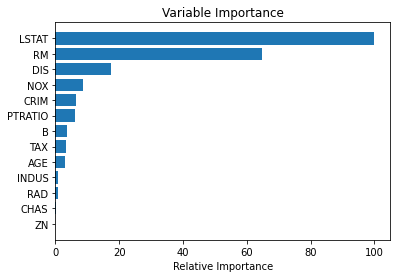

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot feature importance
feature_importance = tuned_model.feature_importances_ # which of the features are more important

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# so using this Gradient boosting we can get a idea regarding which features to use

# Similarly other hyperparameters like max_depth, split criteria, min no of leaf nodes etc can be tuned

# Pros:
 
It iteratively corrects the mistakes of the weak classifier and improves accuracy by combining weak learners. 

Gives better accuracy in most of the cases

# Cons:
Space and time complexity

Hyperparameter tuning